# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [ ]:
from google.colab import files

uploaded = files.upload()

In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "student-mat.csv" with length 56993 bytes


In [ ]:
import io 
  
maths = pd.read_csv(io.StringIO(uploaded['student-mat.csv'].decode('utf-8')))

print(maths.info())
maths.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


# Visual-EDA

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From 

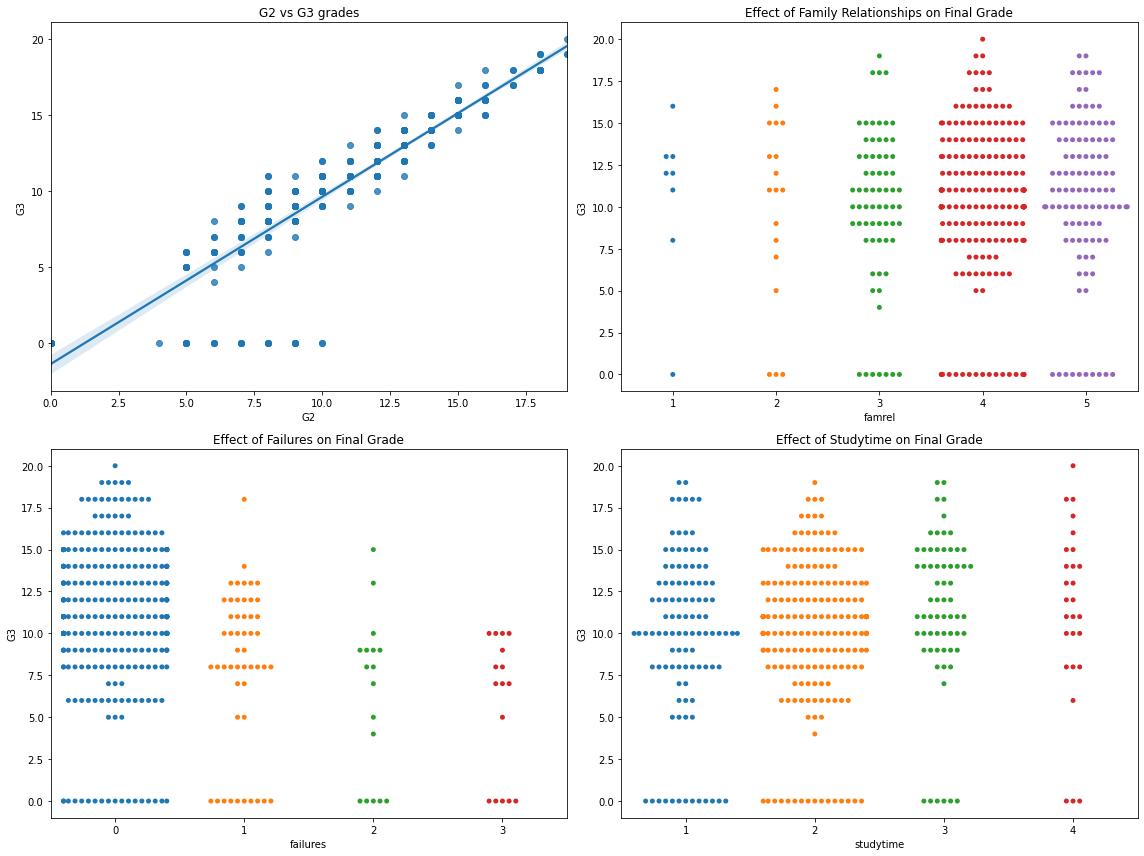

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(16,12))

sns.regplot('G2', 'G3', data=maths, ax=axes[0, 0]).set_title('G2 vs G3 grades')
sns.swarmplot('failures', 'G3', data=maths, ax=axes[1, 0]).set_title('Effect of Failures on Final Grade')
sns.swarmplot('famrel', 'G3', data=maths, ax=axes[0, 1]).set_title('Effect of Family Relationships on Final Grade')
sns.swarmplot('studytime', 'G3', data=maths, ax=axes[1, 1]).set_title('Effect of Studytime on Final Grade')
plt.tight_layout()
plt.show()

# Linear Regression Implementation

In [ ]:
maths = maths.select_dtypes('int64')
maths = maths[['famrel', 'studytime', 'failures', 'absences', 'G1', 'G2', 'G3']]
print(maths.info())

# set our prediction of a students final score (G3)
predict = 'G3'

# split-up X & y and make sure that they are np arrays
# sklearn needs numpy array's as inputs
X = np.array(maths.drop(predict, axis=1))
y = np.array(maths[predict])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   famrel     395 non-null    int64
 1   studytime  395 non-null    int64
 2   failures   395 non-null    int64
 3   absences   395 non-null    int64
 4   G1         395 non-null    int64
 5   G2         395 non-null    int64
 6   G3         395 non-null    int64
dtypes: int64(7)
memory usage: 21.7 KB
None


In [ ]:
# split-up our current X & y variables into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# Now we need to initiate our model and train it

linear = LinearRegression()
linear.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# Lets take a look at how well this model performs
print("The R^2 is: ", linear.score(X_test, y_test))
coeff = linear.coef_
intercept = linear.intercept_

for i in range(len(coeff)):
  print(maths.columns[i], ': ', coeff[i])
print('The intercept of our slope is: ', intercept)

The R^2 is:  0.8316968124174093
famrel :  0.5675565229094424
studytime :  -0.46968540367724887
failures :  -0.5180844666140698
absences :  0.029015504354730215
G1 :  0.11790811767680964
G2 :  0.954990328569435
The intercept of our slope is:  -2.3293128685712166


In conclusion our model explains 83% of the inputs into a students final score. What we can clearly see is the biggest factor going into the estimation is the score that they would get in G2. What does look interesting is the fact that studytime is negatively related to the grade that they get, however this is a very small factor.